In [1]:
import sys
import pandas as pd
sys.path.append("../")

import utils.nextcloud
from utils.targets import Zielwert

letztstand = r"EE/1_Forschung/2_Laufend/PEQ goes klimaaktiv/Quartiere/Python.xlsx"
sheet_name = "Tabelle1"
file = utils.nextcloud.get(letztstand)
df = pd.read_excel(file, sheet_name=sheet_name)
df

,Var,Variante,GFZ,PE_Saldo,Alpha - PE-Saldo mit Dichteausgleich [kWh/m²NGF]2,Context Factor,Import,Export,Alpha - PE-Saldo mit Dichteausgleich; Fernwärmevariante [kWh/m²a],PV-Produktion/m²bebaute Fläche
0,original,Am Bichl - Netzdienlichkeit - Alpha,0.751286,33.394693,18.460648,-14.934045,-28.494190,61.888883,-13.616637,56.513011
1,original,Gneis - Netzdienlichkeit - Alpha,0.851039,25.513250,17.427547,-8.085703,-25.944780,51.458029,-30.438395,67.968416
2,original,Aichinger - Netzdienlichkeit - Alpha,0.234899,110.490342,3.355145,-107.135196,-21.994316,132.484658,-59.764220,37.263006
3,original,Graz SCM - Netzdienlichkeit - Alpha,1.972033,-24.637571,-0.036561,24.601010,-28.729226,4.091655,-32.238762,90.874356
4,original,Glan - Netzdienlichkeit - Alpha,1.048905,9.539493,11.665683,2.126190,-32.622581,42.162074,-32.058285,74.585928
...,...,...,...,...,...,...,...,...,...,...
145,Lüftung-50%,Pilzgasse_Var_PH_alfa,4.575197,-22.950016,17.731537,40.681553,-29.872816,6.922800,6.803400,109.014383
146,JAZ_no freecooling,Pilzgasse_Var_PH_alfa,4.575197,-26.687857,13.993695,40.681553,-30.856880,4.169022,5.626990,122.875505
147,JAZ -25%,Pilzgasse_Var_PH_alfa,4.575197,-25.819483,14.862070,40.681553,-31.632837,5.813354,5.571825,114.493143
148,JAZ -50%,Pilzgasse_Var_PH_alfa,4.575197,-31.237177,9.444376,40.681553,-35.402622,4.165445,5.461496,122.545606


Text(0.5, 0, 'Floor Area Ratio (FAR) [-]')

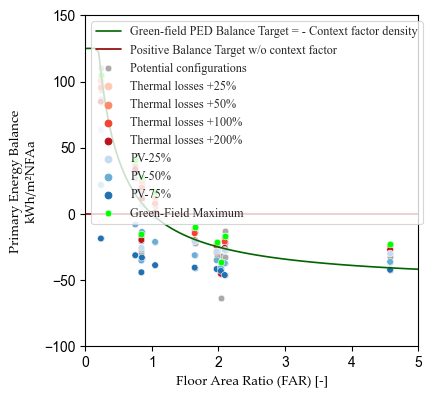

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from  utils.plotting_eng import target_of_gfz

zq_zielwert = Zielwert.ZQSynergy()
fsi = np.linspace(0,5,100)
zw_df = pd.DataFrame()
zw_df["Green-field PED Balance Target = - Context factor density"] = zq_zielwert.df(fsi)
zw_df["Positive Balance Target w/o context factor"] = np.zeros(len(fsi))

fig, ax = plt.subplots(1,1, figsize=(4.3,4.3))

sns.set("paper", font="Times new roman", style="whitegrid", )
target_of_gfz(ax, df=zw_df, xlims=(0,5), ylims=(-100,150), color=["Darkgreen", "darkred"])

df.Var = df.Var.str\
    .replace("therm","Thermal losses ")\

therm = df[df.Var.str.contains("Therm")]
pv = df[df.Var.str.contains("PV")]
angeglichen = df[df.Var=="angeglichen"]

sns.scatterplot(x="GFZ", y="PE_Saldo", data=df, ax=ax, color="darkgrey", label="Potential configurations")
sns.scatterplot(x="GFZ", y="PE_Saldo", data=therm, ax=ax, hue="Var", palette="Reds")
sns.scatterplot(x="GFZ", y="PE_Saldo", data=pv, ax=ax, hue="Var", palette="Blues",)
sns.scatterplot(x="GFZ", y="PE_Saldo", data=angeglichen, ax=ax, color="lime", label="Green-Field Maximum",)
#sns.scatterplot(x="GFZ", y="PE_Saldo", data=df_plot, ax=ax, color="lightgreen", hue="Variantenname", palette="grey")


ax.set_ylabel("Primary Energy Balance\nkWh/m²NFAa", font="Palatino Linotype")
ax.set_xlabel("Floor Area Ratio (FAR) [-]", font="Palatino Linotype")



Text(0.5, 0, 'Primary Energy Import [kWh/m²NFA]')

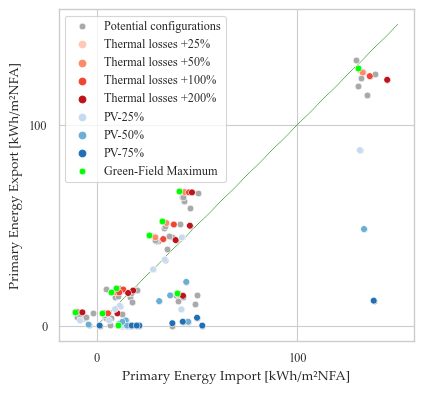

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from  utils.plotting_eng import target_of_gfz


df["Bedarf"] = -df.Import - df["Context Factor"]
df["Export"] = df.Export 

fig, ax = plt.subplots(1,1, figsize=(7,4.3))
ax.set_aspect('equal')
ax.set_xticks([0,100,200])
ax.set_yticks([0,100,200])
therm = df[df.Var.str.contains("Therm")]
pv = df[df.Var.str.contains("PV")]
angeglichen = df[df.Var=="angeglichen"]

xlim,ylim = 150,150
ax.arrow(0,0, xlim, ylim, color="green", linestyle="dotted", linewidth=0.4)
sns.scatterplot(x="Bedarf", y="Export", data=df, ax=ax, color="darkgrey", label="Potential configurations")
sns.scatterplot(x="Bedarf", y="Export", data=therm, ax=ax, hue="Var", palette="Reds")
sns.scatterplot(x="Bedarf", y="Export", data=pv, ax=ax, hue="Var", palette="Blues",)
sns.scatterplot(x="Bedarf", y="Export", data=angeglichen, ax=ax, color="lime", label="Green-Field Maximum",)


ax.set_ylabel("Primary Energy Export [kWh/m²NFA]", font="Palatino Linotype")
ax.set_xlabel("Primary Energy Import [kWh/m²NFA]", font="Palatino Linotype")



In [57]:


df_orig = df[df.Var=="original"]
df_reduced = df.copy()
relative_cols = df_orig.columns[3:].drop("Context Factor")
relative_cols

Index(['PE_Saldo', 'Alpha - PE-Saldo mit Dichteausgleich [kWh/m²NGF]2',
       'Import', 'Export',
       'Alpha - PE-Saldo mit Dichteausgleich; Fernwärmevariante [kWh/m²a]',
       'PV-Produktion/m²bebaute Fläche', 'Bedarf'],
      dtype='object')

In [70]:
df_diff = pd.DataFrame()

for i, row in df_reduced.iterrows():
    
    orig_row = df_orig[df_orig["Variante"]==row["Variante"]]
    diff= row[relative_cols] - orig_row[relative_cols]
    diff["Var"] = row["Var"]
    diff["Variante"] = row["Variante"]
    diff["GFZ"] = row["GFZ"]
    
    df_diff = df_diff.append(diff, ignore_index=True)


C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_35396\4157094694.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_diff = df_diff.append(diff, ignore_index=True)
C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_35396\4157094694.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_diff = df_diff.append(diff, ignore_index=True)
C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_35396\4157094694.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_diff = df_diff.append(diff, ignore_index=True)
C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_35396\4157094694.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from  utils.plotting_eng import target_of_gfz

zq_zielwert = Zielwert.ZQSynergy()
fsi = np.linspace(0,5,100)
zw_df = pd.DataFrame()
zw_df["Green-field PED Balance Target = - Context factor density"] = zq_zielwert.df(fsi)
zw_df["Positive Balance Target w/o context factor"] = np.zeros(len(fsi))

fig, ax = plt.subplots(1,1, figsize=(4.3,4.3))

sns.set("paper", font="Times new roman", style="whitegrid", )
target_of_gfz(ax, df=zw_df, xlims=(0,5), ylims=(-100,150), color=["Darkgreen", "darkred"])

df.Var = df.Var.str\
    .replace("therm","Thermal losses ")\

therm = df[df.Var.str.contains("Therm")]
pv = df[df.Var.str.contains("PV")]
angeglichen = df[df.Var=="angeglichen"]

sns.scatterplot(x="GFZ", y="PE_Saldo", data=df, ax=ax, color="darkgrey", label="Potential configurations")
sns.scatterplot(x="GFZ", y="PE_Saldo", data=therm, ax=ax, hue="Var", palette="Reds")
sns.scatterplot(x="GFZ", y="PE_Saldo", data=pv, ax=ax, hue="Var", palette="Blues",)
sns.scatterplot(x="GFZ", y="PE_Saldo", data=angeglichen, ax=ax, color="lime", label="Green-Field Maximum",)
#sns.scatterplot(x="GFZ", y="PE_Saldo", data=df_plot, ax=ax, color="lightgreen", hue="Variantenname", palette="grey")


ax.set_ylabel("Primary Energy Balance\nkWh/m²NFAa", font="Palatino Linotype")
ax.set_xlabel("Floor Area Ratio (FAR) [-]", font="Palatino Linotype")



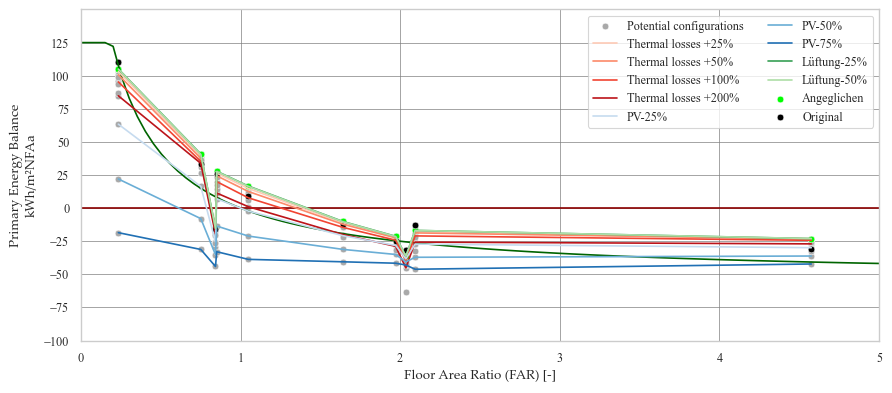

In [104]:


fig, ax = plt.subplots(1,1, figsize=(10.3,4.3))

target_of_gfz(ax, df=zw_df, xlims=(0,5), ylims=(-100,150), color=["Darkgreen", "darkred"], no_legend=True)


therm = df[df.Var.str.contains("Therm")]
pv = df[df.Var.str.contains("PV")]
vent = df[df.Var.str.contains("Lüft")]
angeglichen = df[df.Var=="angeglichen"]

sns.scatterplot(x="GFZ", y="PE_Saldo", data=df, ax=ax, color="darkgrey", label="Potential configurations")
sns.lineplot(x="GFZ", y="PE_Saldo", data=therm, ax=ax, hue="Var", palette="Reds")
sns.lineplot(x="GFZ", y="PE_Saldo", data=pv, ax=ax, hue="Var", palette="Blues",)
sns.lineplot(x="GFZ", y="PE_Saldo", data=vent, ax=ax, hue="Var", palette="Greens_r",)
sns.scatterplot(x="GFZ", y="PE_Saldo", data=angeglichen, ax=ax, color="lime", label="Angeglichen",)
sns.scatterplot(x="GFZ", y="PE_Saldo", data=df_orig, ax=ax, color="black", label="Original",)
#sns.scatterplot(x="GFZ", y="PE_Saldo", data=df_plot, ax=ax, color="lightgreen", hue="Variantenname", palette="grey")

ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=0.5)
ax.set_yticks(range(-100,150,25))
ax.set_ylabel("Primary Energy Balance\nkWh/m²NFAa", font="Palatino Linotype")
ax.set_xlabel("Floor Area Ratio (FAR) [-]", font="Palatino Linotype")
ax.legend(loc="upper right", ncols=2)


In [93]:
df_diff.columns

Index(['PE_Saldo', 'Alpha - PE-Saldo mit Dichteausgleich [kWh/m²NGF]2',
       'Import', 'Export',
       'Alpha - PE-Saldo mit Dichteausgleich; Fernwärmevariante [kWh/m²a]',
       'PV-Produktion/m²bebaute Fläche', 'Bedarf', 'Var', 'Variante', 'GFZ'],
      dtype='object')

In [154]:

dtherm = df_diff[df_diff.Var.str.contains("Therm")]
dpv = df_diff[df_diff.Var.str.contains("PV")]
dvent = df_diff[df_diff.Var.str.contains("Lüft")]
dcop = df_diff[df_diff.Var.str.contains("JAZ")]
ddsm = df_diff[df_diff.Var.str.contains("DSM")]
dangeglichen = df[df.Var=="angeglichen"]

comps = {
    "Reds_r": dtherm,
    "Blues":  dpv,
    "Blues_r": dvent,
    "Greens_r": dcop,
  #  "Greys": ddsm
}

C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_35396\1796220360.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GFZ'] = pd.to_numeric(df['GFZ'], errors='coerce')
C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_35396\1796220360.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PE_Saldo'] = pd.to_numeric(df['PE_Saldo'], errors='coerce')
C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_35396\1796220360.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

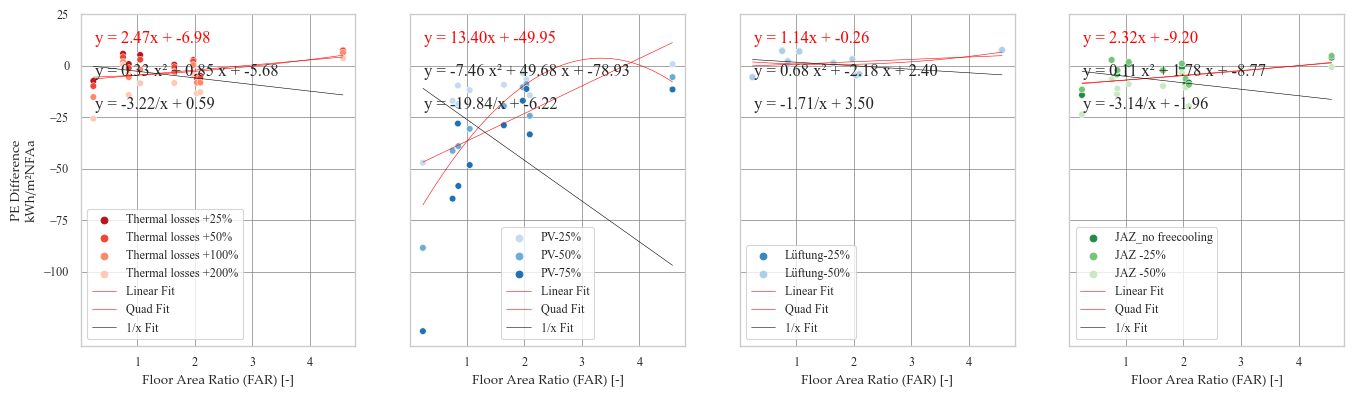

In [161]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def subplot(ax, df, palette, ylims=(-100,50)):
    # Convert 'GFZ' and 'PE_Saldo' to numeric, handling non-numeric values
    df['GFZ'] = pd.to_numeric(df['GFZ'], errors='coerce')
    df['PE_Saldo'] = pd.to_numeric(df['PE_Saldo'], errors='coerce')

    # Optionally, drop rows where either 'GFZ' or 'PE_Saldo' is NaN
    df = df.dropna(subset=['GFZ', 'PE_Saldo'])

    sns.scatterplot(x="GFZ", y="PE_Saldo", data=df, ax=ax, hue="Var", palette=palette)

    x = df['GFZ']
    y = df['PE_Saldo']
    z = 1/x

    # Fit the regression model
    model1 = np.polyfit(x, y, 1)
    predict1 = np.poly1d(model1)
    model2 = np.polyfit(x, y, 2)
    predict2 = np.poly1d(model2)
    model3 = np.polyfit(z, y, 1)
    predict3 = np.poly1d(model3)
    # Generate x values for your trendline (from min to max of your data)
    x_lin_reg = np.linspace(min(x), max(x), 100)
    y_lin_reg1 = predict1(x_lin_reg)
    y_lin_reg2 = predict2(x_lin_reg)
    # Generate z values for your trendline
    z_lin_reg = np.linspace(min(z), max(z), 100)
    y_lin_reg3 = predict3(z_lin_reg)

# Convert back to original x values for plotting
    x_lin_reg3 = 1 / z_lin_reg

    # Plot the trendline
    ax.plot(x_lin_reg, y_lin_reg1, color="red", label='Linear Fit', linewidth=0.4)
    ax.plot(x_lin_reg, y_lin_reg2, color='blue', label='Quad Fit', linewidth=0.4)
    ax.plot(x_lin_reg3, y_lin_reg3, color='black', label='1/x Fit', linewidth=0.4)
    # Get the slope and intercept for the annotation
    slope, intercept = model1
    a,b,c = model2
    d, e = model3
    # Format the formula string
    formula_str1 = f'y = {slope:.2f}x + {intercept:.2f}'
    formula_str2 = f'y = {a:.2f} x² + {b:.2f} x + {c:.2f}'
    formula_str3 = f'y = {d:.2f}/x + {e:.2f}'
    # Add the formula as an annotation on the plot
    ax.text(0.05, 0.95, formula_str1, transform=ax.transAxes, fontsize=12, verticalalignment='top', color="red")
    ax.text(0.05, 0.85, formula_str2, transform=ax.transAxes, fontsize=12, verticalalignment='top', color="blue")
    ax.text(0.05, 0.75, formula_str3, transform=ax.transAxes, fontsize=12, verticalalignment='top')

    # Grid, labels, and other settings
    ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=0.5)
    ax.set_ylabel("PE Difference\nkWh/m²NFAa", font="Palatino Linotype")
    ax.set_xlabel("Floor Area Ratio (FAR) [-]", font="Palatino Linotype")
    ax.set_yticks(range(ylims[0],ylims[1],25))
    ax.legend()



fig, axes = plt.subplots(1,len(comps.keys()), figsize=(16.3, 4.3), sharey=True)
for ax, palette, df in zip(axes, comps.keys(), comps.values()):
    subplot(ax, df=df, palette=palette)
